In [2]:
from pathlib import Path
from eda import data_basics, imputed_check, group_features, _encode_target, correlation_analysis, pca_analysis

## Exploratory Data Analysis

### Basic data facts

In [3]:
DATASET_PATH = Path("../data/breast_cancer.csv")

BASE_FEATURES = ['radius', 'texture', 'perimeter', 'area', 'smoothness',
                    'compactness', 'concavity', 'concave points', 'symmetry',
                    'fractal_dimension']

cancer_data, data_descriptive_stats = data_basics(DATASET_PATH)

DATASET ANALYSIS OF: breast_cancer.csv

📊 DATASET DIMENSIONS: 512 rows x 31 columns

📋 COLUMN DATA TYPES:

🏷️ diagnosis is the only categorical column (type: object)
📊 All the other 30 numerical columns are of type: float64

🔍 DUPLICATE SAMPLES: 0

⚖️ DIAGNOSIS CLASS DISTRIBUTION:
  - B: 321 samples (62.7%)
  - M: 191 samples (37.3%)

❓ MISSING VALUES:
radius_mean                 7
texture_mean                5
perimeter_mean              5
area_mean                   4
smoothness_mean             6
compactness_mean            1
concavity_mean             10
concave points_mean         8
symmetry_mean               5
fractal_dimension_mean      3
radius_se                   2
texture_se                  7
perimeter_se                1
area_se                     3
smoothness_se               6
compactness_se              4
concavity_se                2
concave points_se           4
symmetry_se                 5
fractal_dimension_se        5
radius_worst                5
texture_worst  

In [4]:
data_descriptive_stats

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,505.00000,507.000000,507.000000,508.000000,506.000000,511.000000,502.000000,504.000000,507.000000,509.000000,...,507.000000,510.000000,505.000000,505.000000,507.000000,503.000000,508.000000,501.000000,509.000000,505.000000
mean,14.17355,19.364142,92.231933,657.616929,0.096168,0.103624,0.088031,0.048893,0.181339,0.062667,...,16.313700,25.754941,107.876515,889.918812,0.131889,0.251145,0.272561,0.114208,0.289997,0.083879
std,3.55379,4.314426,24.584304,357.110765,0.014208,0.053119,0.080220,0.039362,0.027501,0.006864,...,4.885558,6.152356,34.106884,579.834235,0.023130,0.155159,0.209698,0.065945,0.061297,0.018044
min,6.98100,9.710000,43.790000,143.500000,0.062510,0.019380,0.000000,0.000000,0.106000,0.050240,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.71000,16.195000,75.235000,420.175000,0.085843,0.064130,0.028835,0.019983,0.162100,0.057640,...,12.980000,21.222500,84.160000,514.000000,0.114750,0.143700,0.116625,0.064130,0.250600,0.071470
50%,13.40000,18.890000,86.340000,548.750000,0.095200,0.091820,0.059640,0.033455,0.179200,0.061470,...,14.980000,25.445000,97.900000,686.600000,0.131100,0.211800,0.225450,0.099100,0.281800,0.079930
75%,15.78000,21.830000,104.200000,784.150000,0.105250,0.129850,0.128650,0.073460,0.195700,0.066210,...,19.125000,30.015000,127.100000,1124.000000,0.146000,0.328050,0.385300,0.161300,0.317600,0.092030
max,28.11000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


From this first basic dataset analysis we observe that:
1. The samples are 512 in total and the features are 30, because of this fact we do not stumble on the challenge of having many more predictors than samples (big-p, little n or p >> n problem), which can pose a difficult challenge for machine learning tasks.

2. We have a binary classification dataset, were the classes are moderately imbalanced,  so it is crucial to choose suitable  metrics  for  training  and  model  selection. 

3. There exists a small number of missing values, which we will address later in the exploratory analysis, so our data will be ready for classification.

### Addressing missing values

In [4]:
imputed_check(cancer_data)

Imputing missing values...
Checking for distribution differences after imputation with KS statistic:
--------------------------------------------------
No significant difference in distribution (p=1.0000)
No significant difference in distribution (p=1.0000)
No significant difference in distribution (p=1.0000)
No significant difference in distribution (p=1.0000)
No significant difference in distribution (p=1.0000)
No significant difference in distribution (p=1.0000)
No significant difference in distribution (p=1.0000)
No significant difference in distribution (p=1.0000)
No significant difference in distribution (p=1.0000)
No significant difference in distribution (p=1.0000)
No significant difference in distribution (p=1.0000)
No significant difference in distribution (p=1.0000)
No significant difference in distribution (p=1.0000)
No significant difference in distribution (p=1.0000)
No significant difference in distribution (p=1.0000)
No significant difference in distribution (p=1.0000)


We choose to impute the small number of missing values by replacing them with the mean of each feature. 

This approach is simple, it preserves the mean of the feature distributions and is appropriate when the missing values are randomly distributed like our case.

We checked for any changes in feature distributions using the Kolmogorov-Smirnov test and we found no significant alteration.

### Plotting the base features in groups

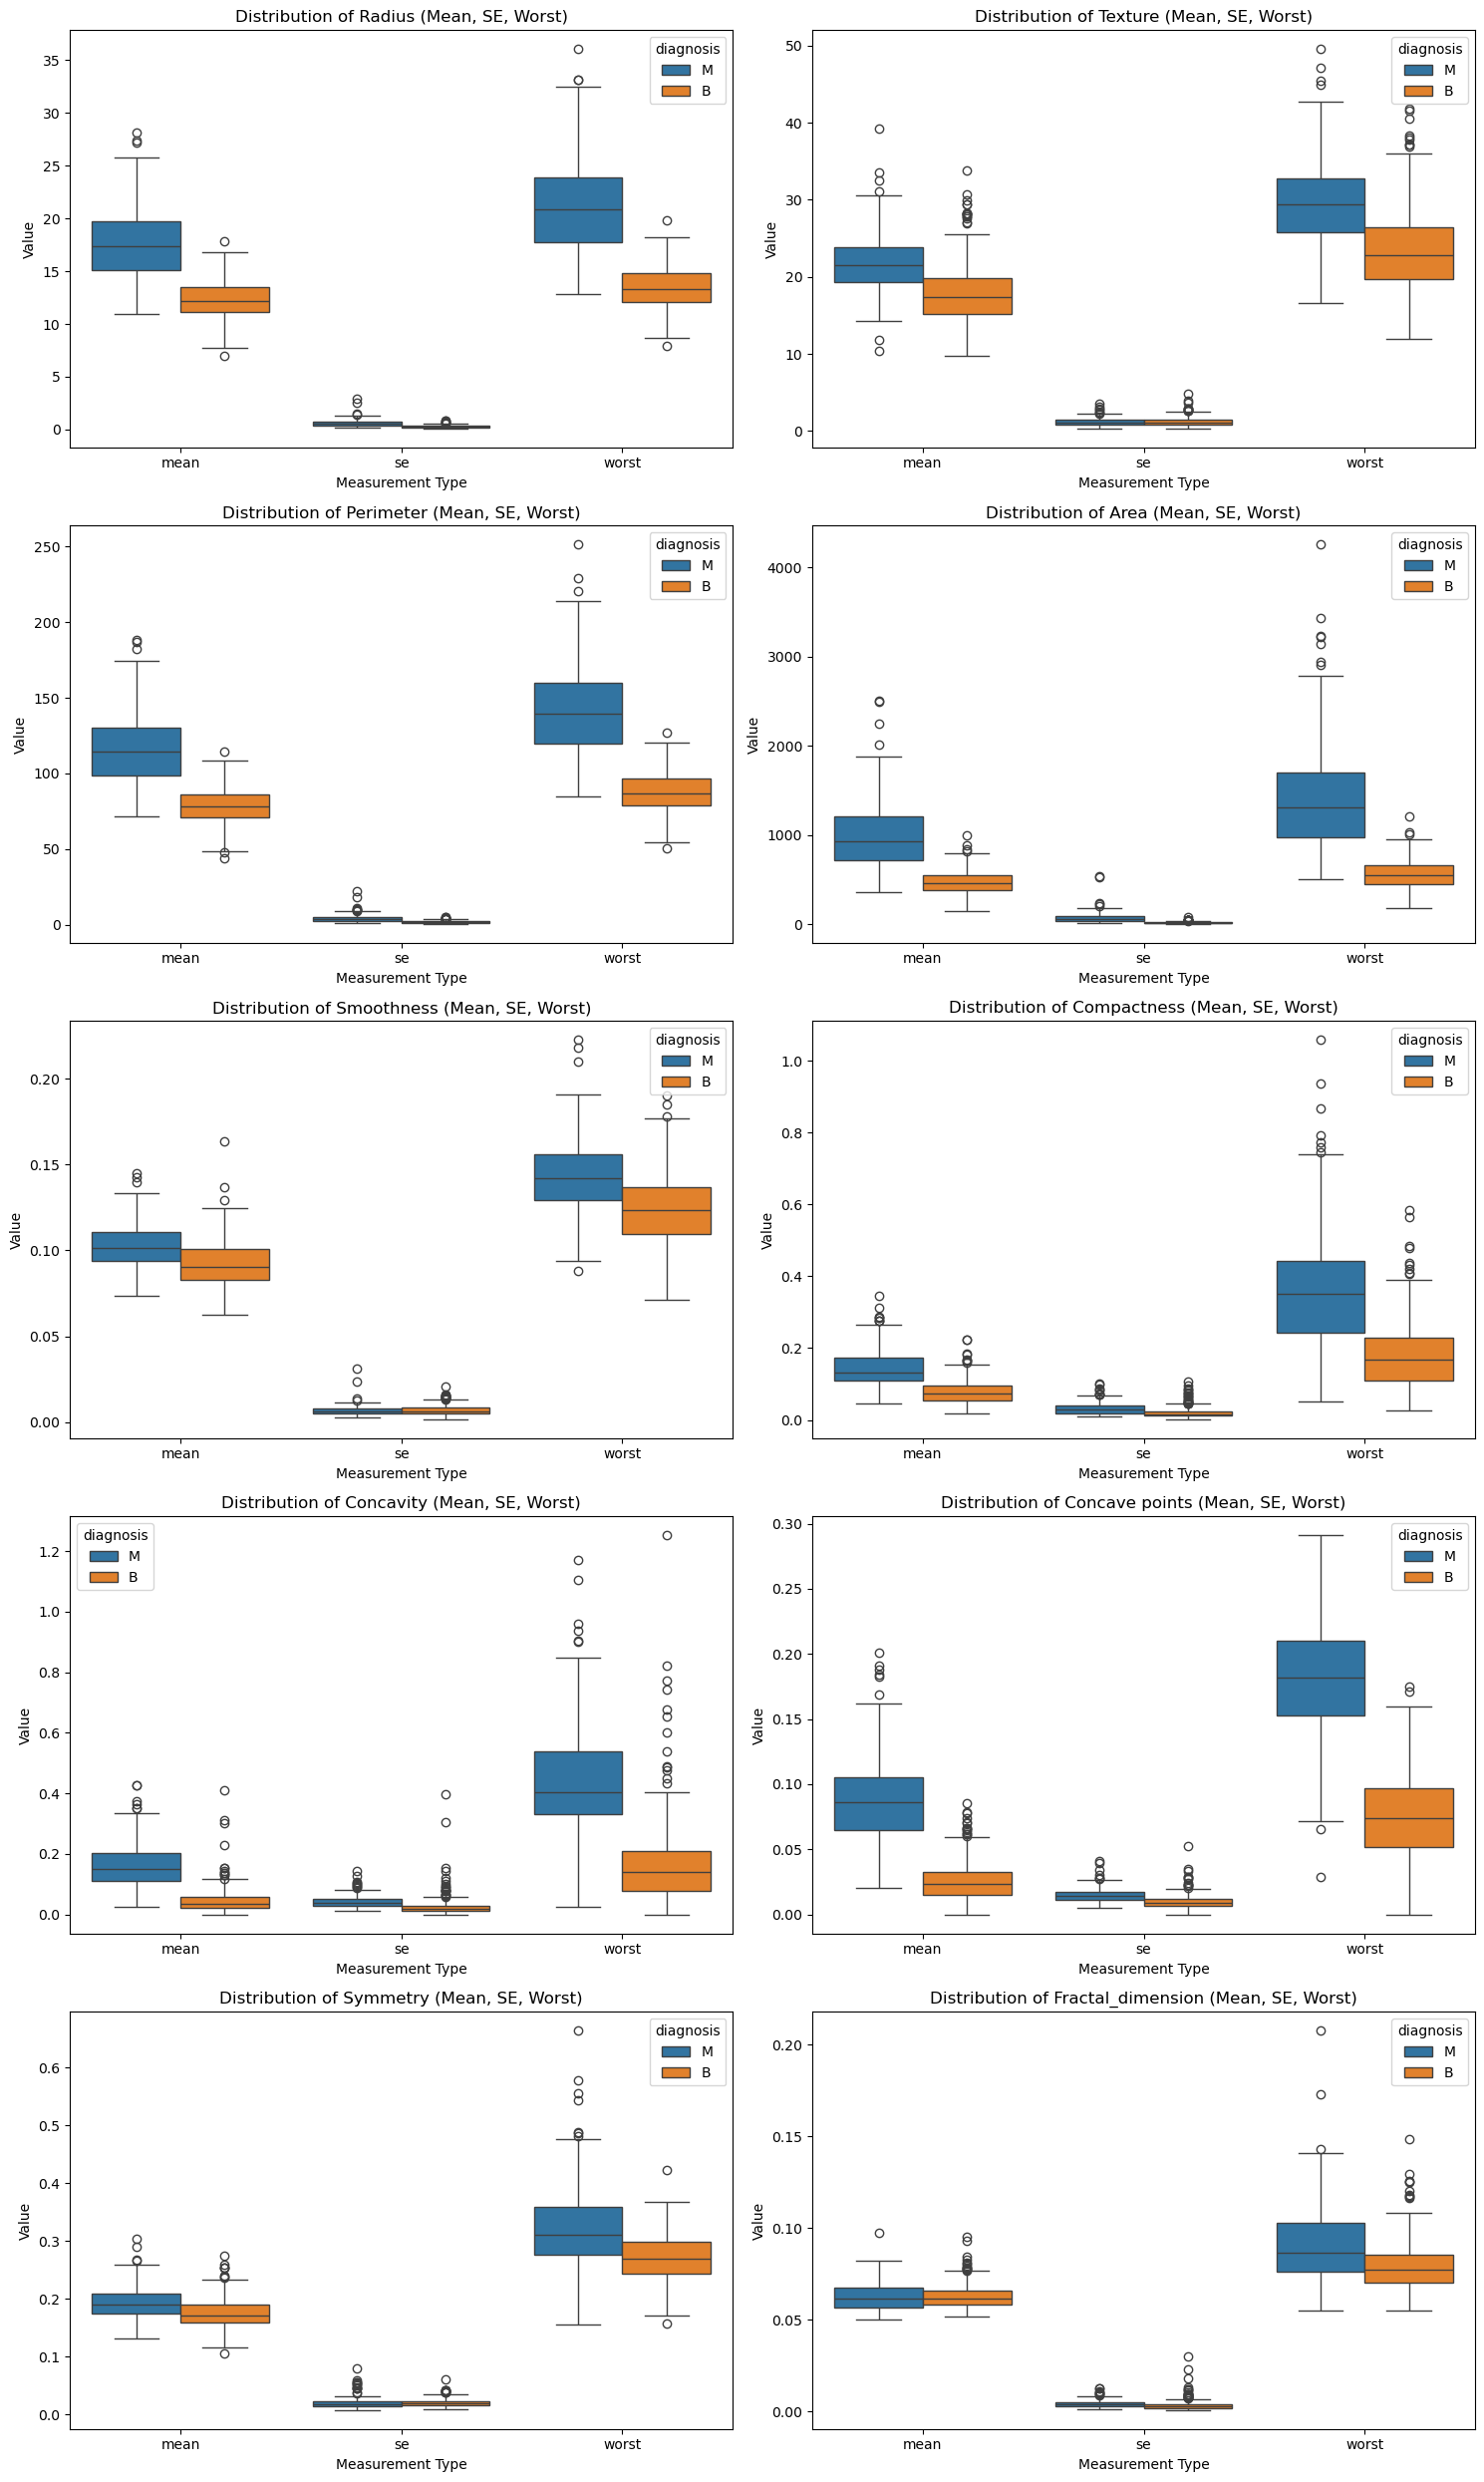

In [5]:
group_features(cancer_data, BASE_FEATURES)

By grouping the features by their the 10 fundamental properties, we get the following valuable insights:

1. The mean shows consistent differences between the classes, accross all fundamental properties, except Smoothness, Symmetry and Fractal_dimention.
2. The standard error (SE) has small values that are very similar between the classes for all fundamental properties.
3. The worst values are consistently differences between the classes, accross all fundamental properties, except Smoothness, Symmetry and Fractal_dimention.

### Calculating Pearson correlation and plotting the most correlated features

Encoding target 'diagnosis': M=1, B=0


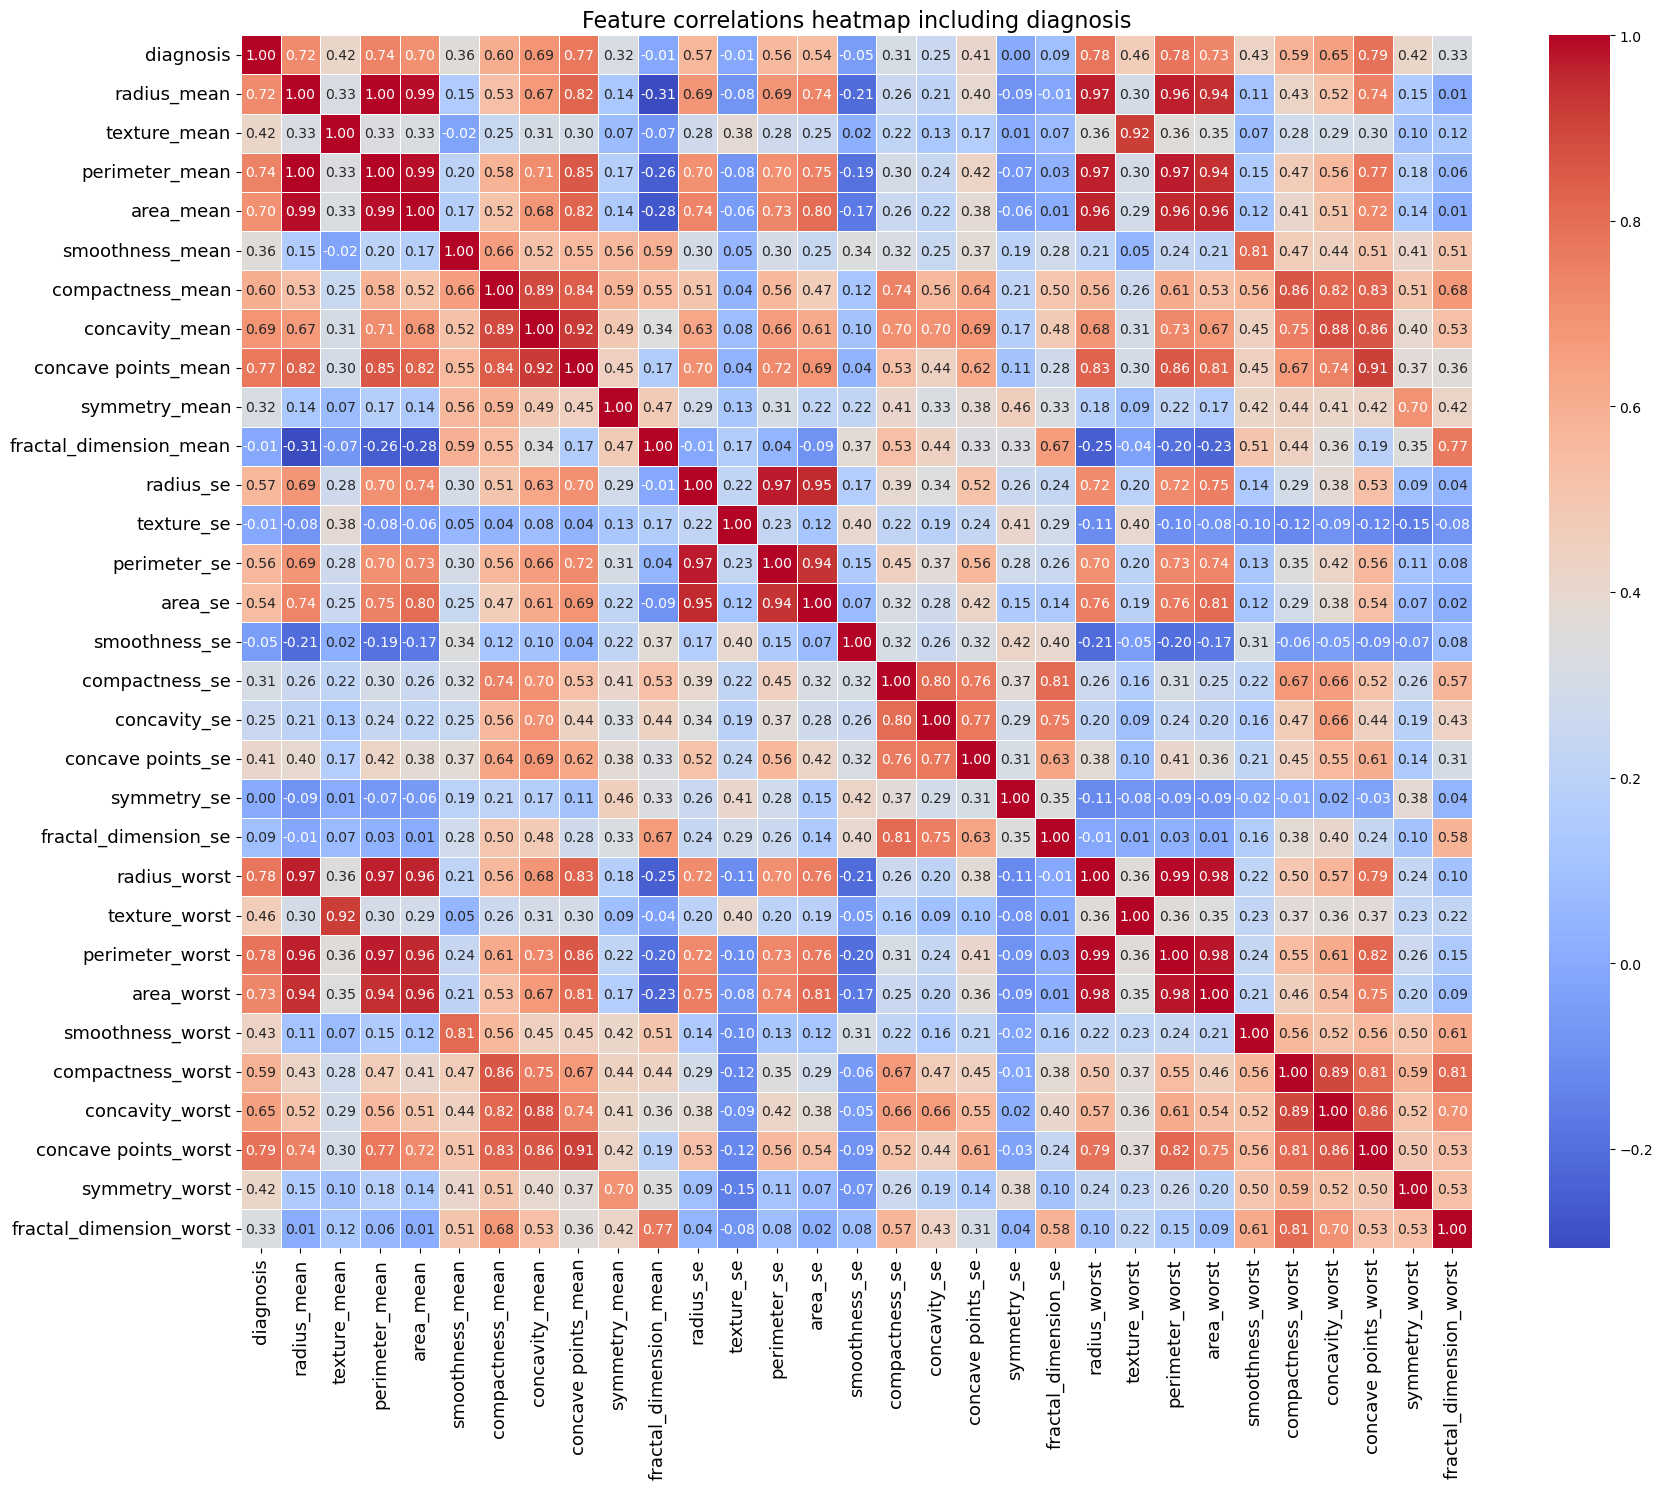

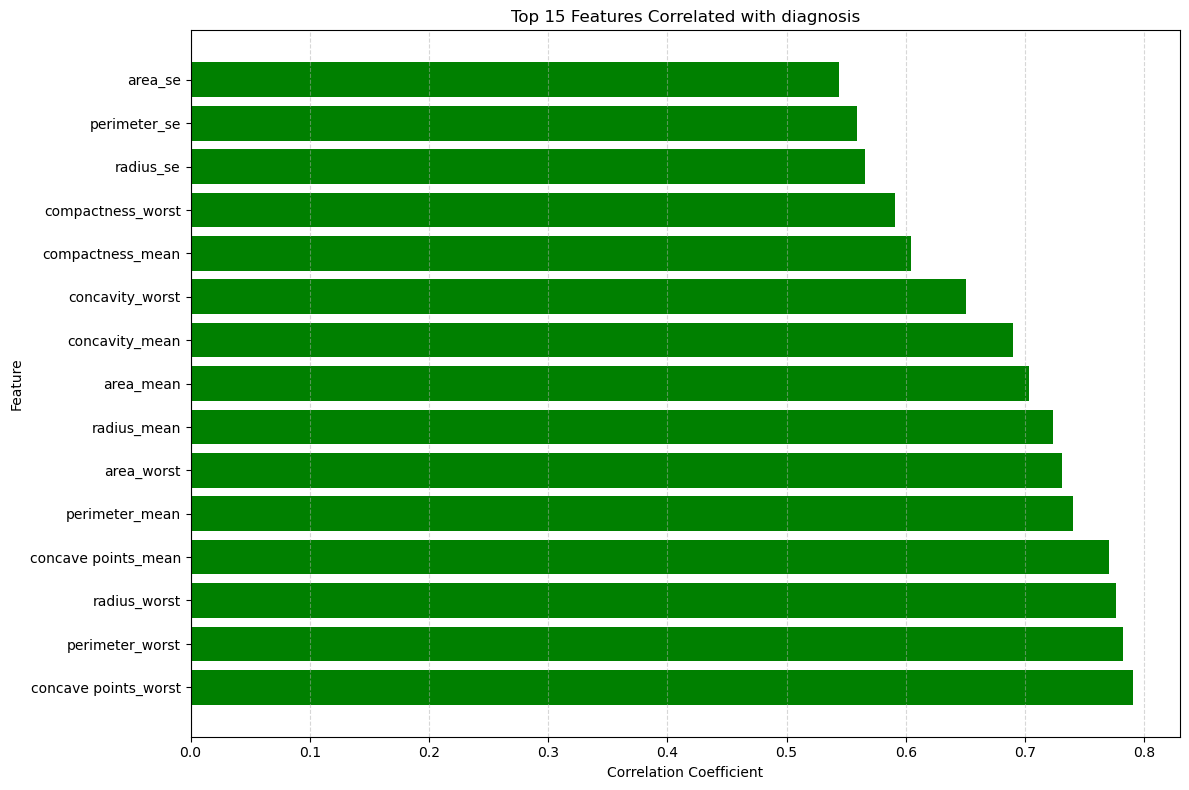

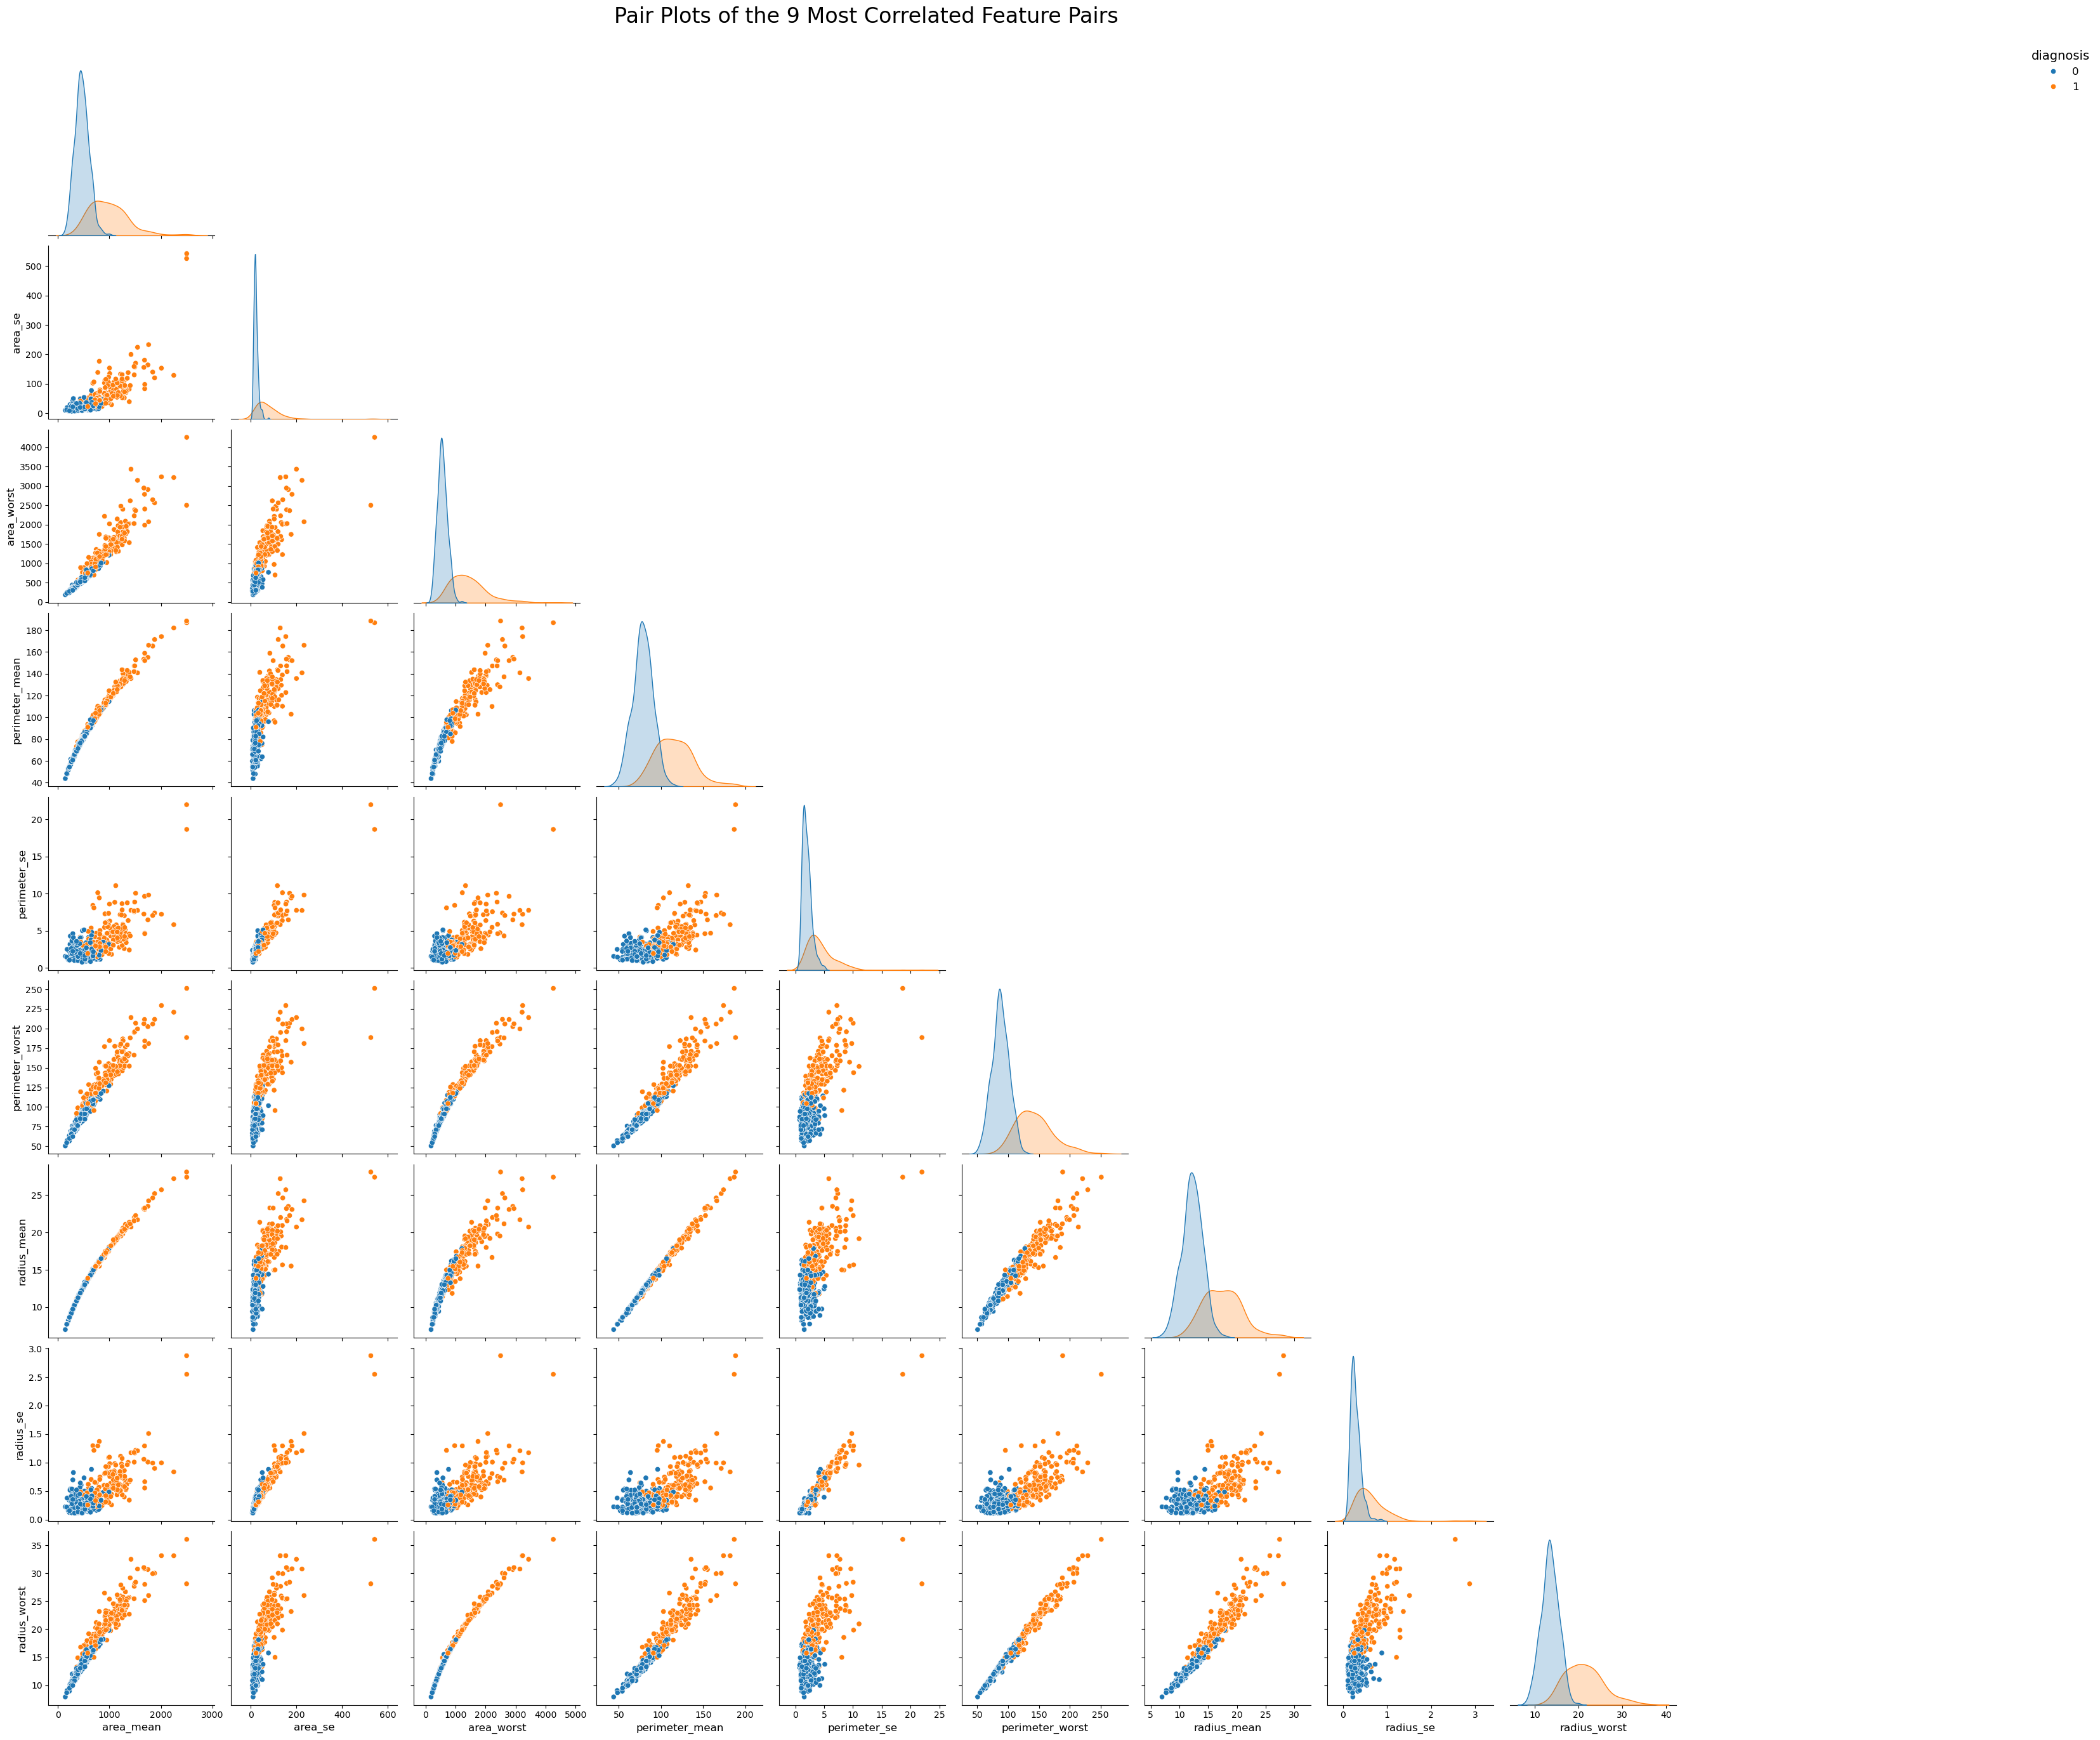

In [6]:
correlation_analysis(cancer_data)

The highlights of the correlation analysis are the following:

1. We observe at least 15 features that are highly associated with the malignant tumor class. They capture meaningful biological differences, with increased size and irregularity metrics strongly associated with malignancy.

2. There is inherent redundancy, as expected from the feature definitions (mean, SE, worst of related properties).

3. High correlation between features suggests multicollinearity. This suggests that we should focus our attention on using regularized models and tree-based models.

4. Crucially, the features provide good visual separability between malignant and benign classes, indicating high potential for successful classification.

6. The classes differ not only in their central tendency (average feature values) but also in their variability (spread of feature values), offering better chances for class separation.

### Principal Component Analysis

Imputing missing values...
Standardizing features...
Applying PCA with 10 components...
Total explained variance with 10 components: 95.14%


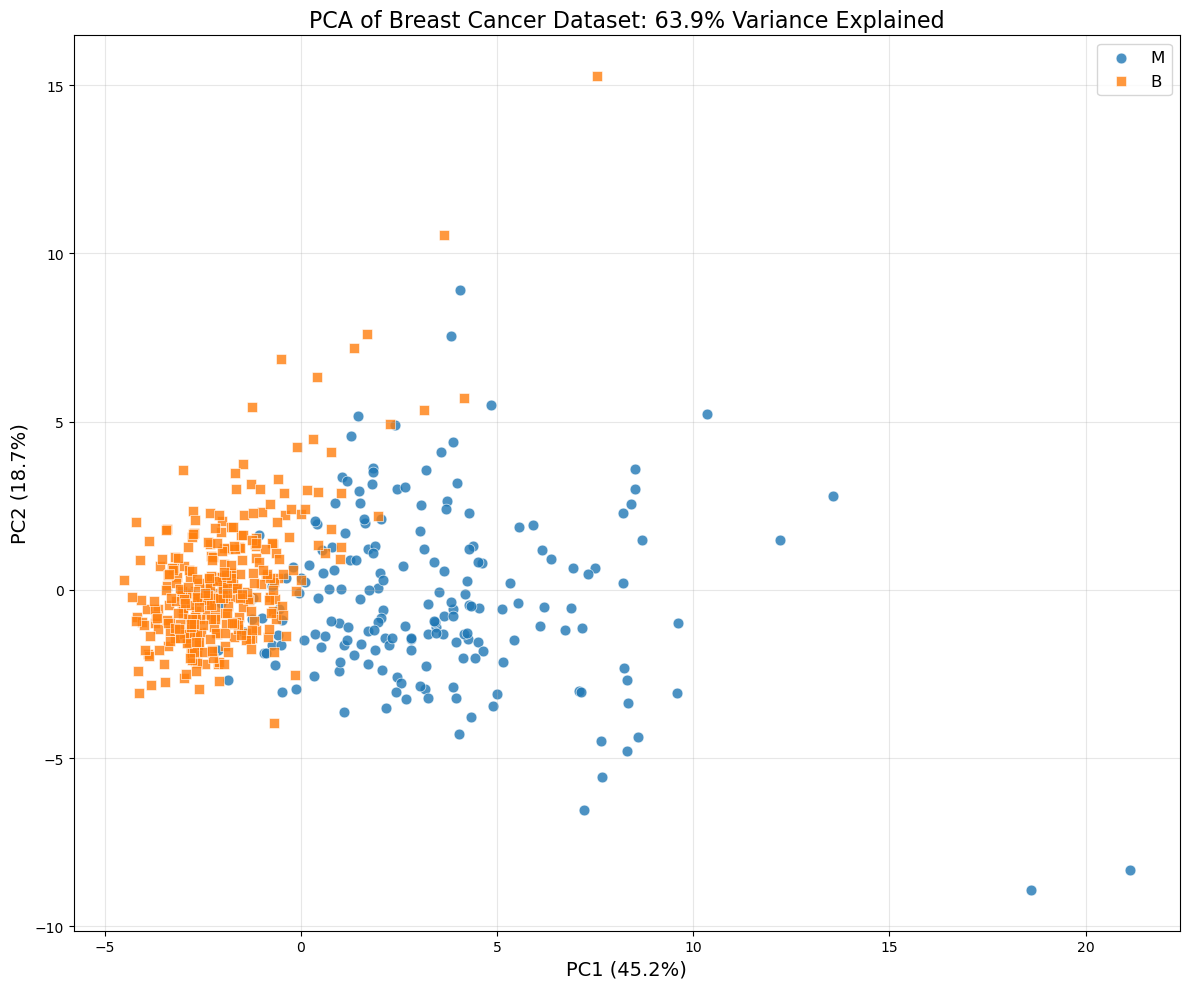

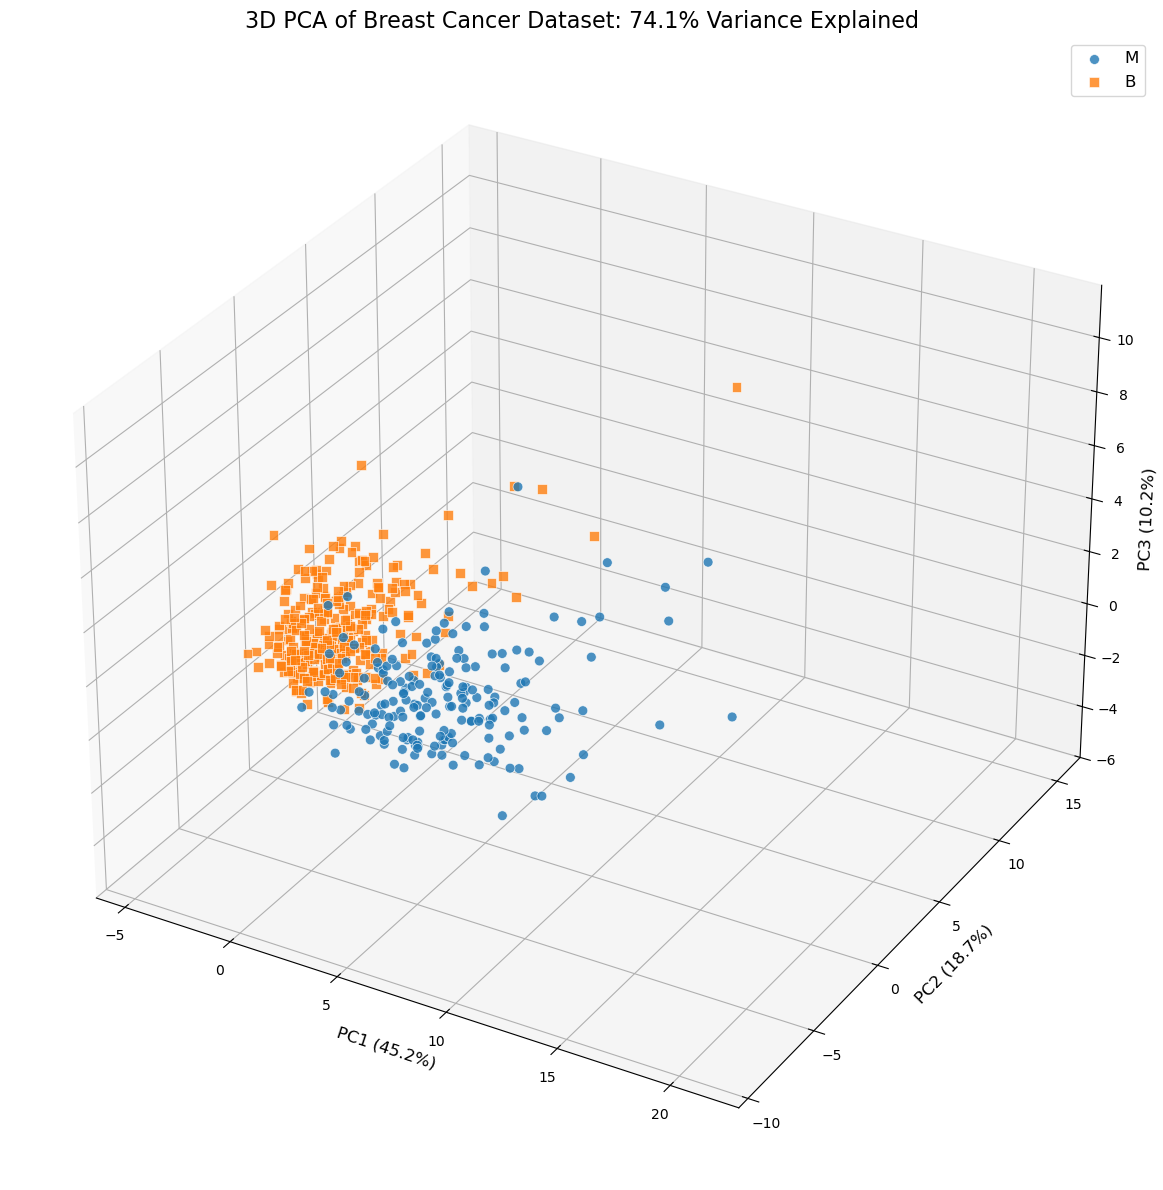

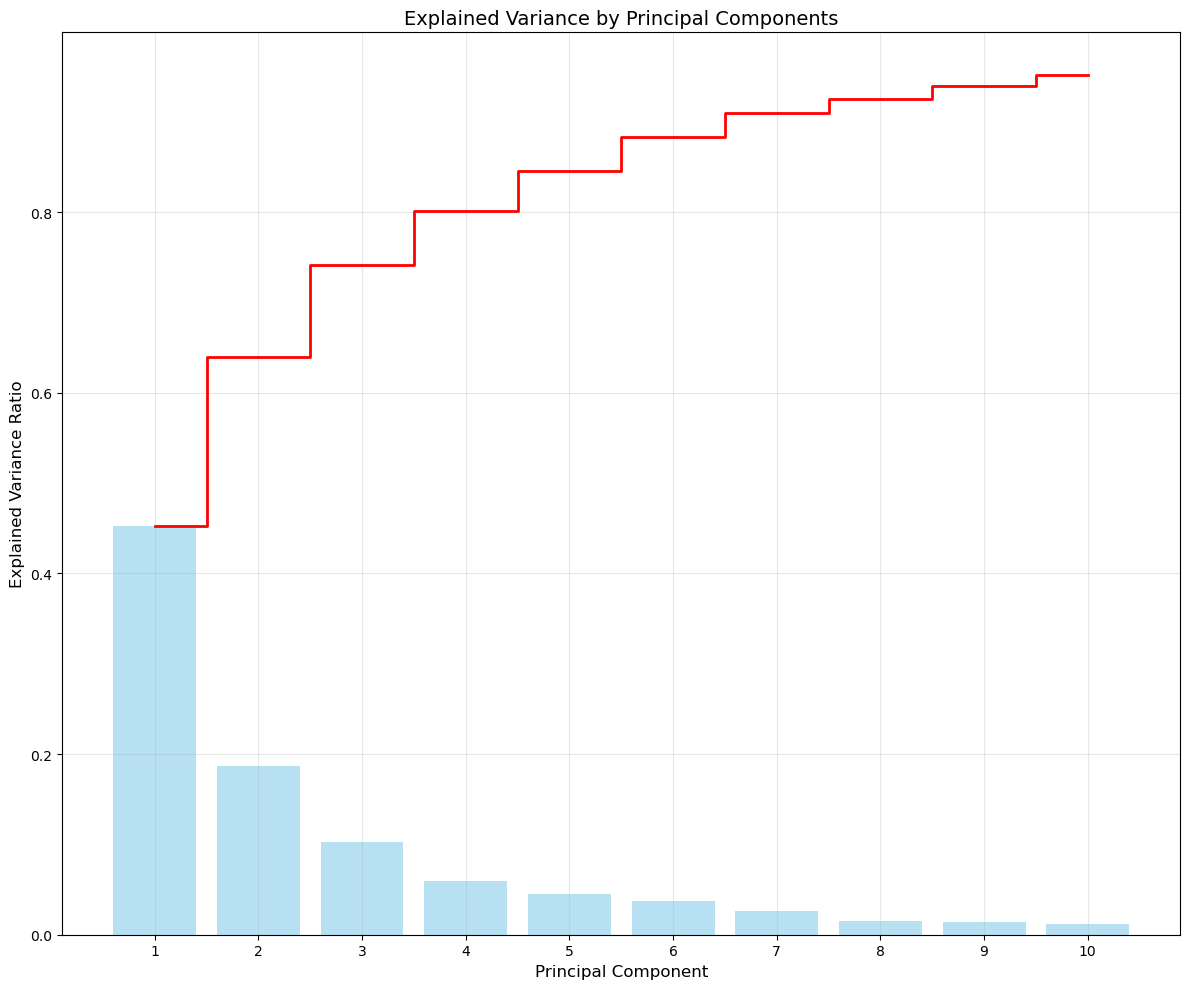

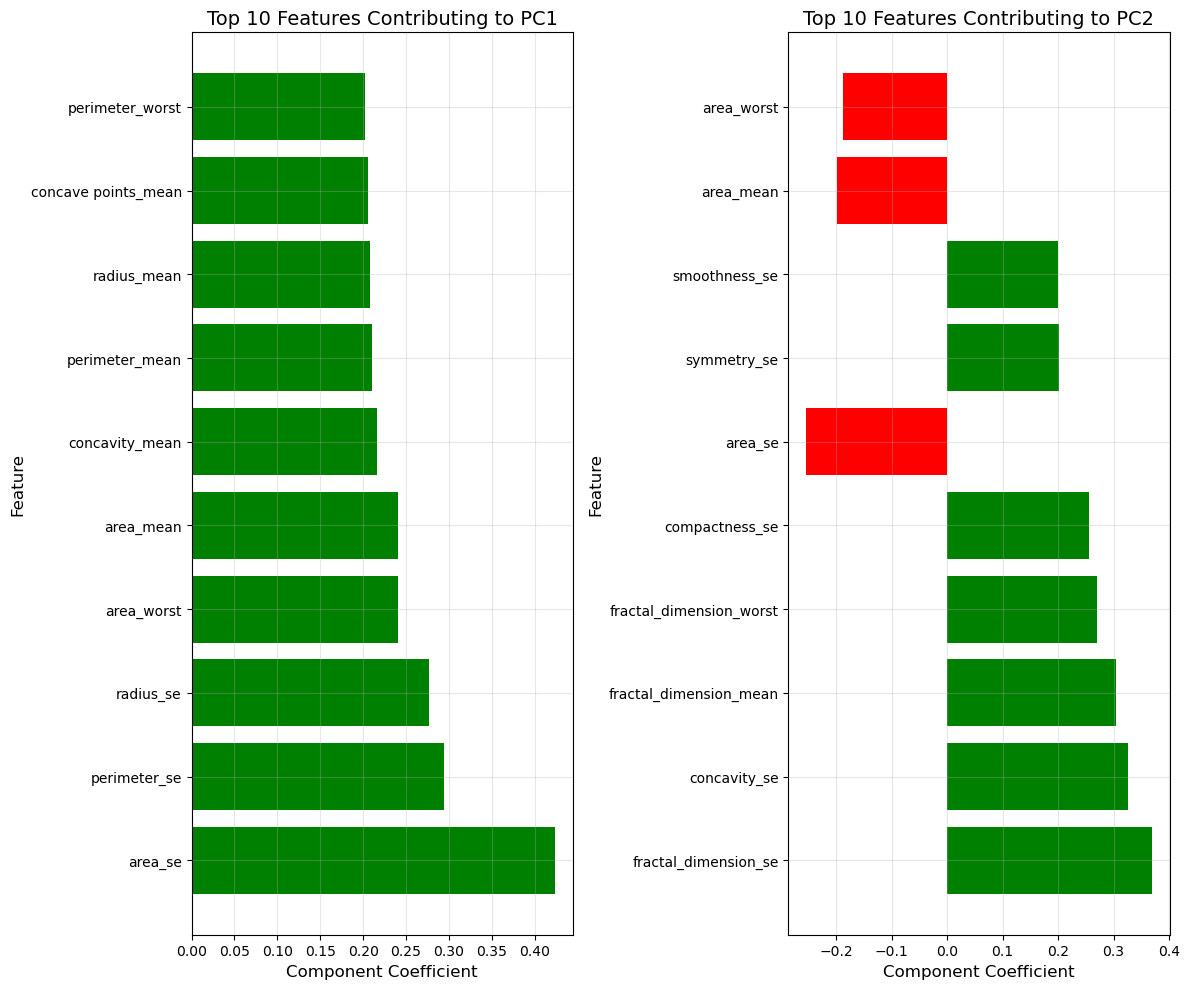

In [7]:
pca_analysis(cancer_data, 10)

Principal component analysis shows the following:

1. The data are separated very well with only 2-3 components.
2. With 10 components the 95% of the variance can be explained.
3. Size and irregularity metrics very similar to the previously discovered ones from the correlation analysis contribute the most to PC1 and PC2.